In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
X_train = np.load("../SpeechER/data_split/X_train.npy")
X_test = np.load("../SpeechER/data_split/X_test.npy")
y_train = np.load("../SpeechER/data_split/y_train.npy")
y_test = np.load("../SpeechER/data_split/y_test.npy")

In [5]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=5, activation="relu", padding="same", input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Conv1D(filters=128, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=8, activation="softmax"))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()
model.save("../SpeechER/models/model6.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 33, 256)          0         
 1D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 33, 256)          1024      
 hNormalization)                                                 
                                                                 
 conv1d_3 (Conv1D)           (None, 33, 128)           163968    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 7, 128)           0         
 1D)                                                             
                                                      

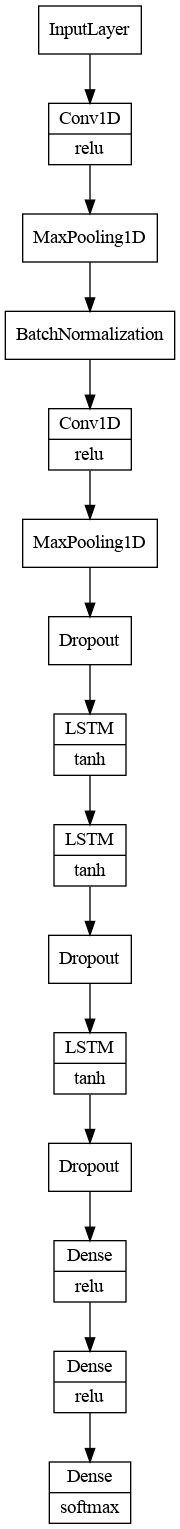

In [6]:
plot_model(model, "../SpeechER/figs/m6arc.png", show_layer_names=False, show_layer_activations=True)

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("../SpeechER/checkpoints/model6_best", save_best_only=True)
stop_early = EarlyStopping(monitor='val_loss', patience=20)

In [22]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[stop_early, checkpoint])

Epoch 1/100
850/856 [============================>.] - ETA: 0s - loss: 1.7204 - accuracy: 0.2916

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 16s 15ms/step - loss: 1.7200 - accuracy: 0.2919 - val_loss: 1.8321 - val_accuracy: 0.2609
Epoch 2/100
849/856 [============================>.] - ETA: 0s - loss: 1.5838 - accuracy: 0.3513

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.5841 - accuracy: 0.3508 - val_loss: 1.5016 - val_accuracy: 0.3953
Epoch 3/100
854/856 [============================>.] - ETA: 0s - loss: 1.5071 - accuracy: 0.3886

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.5067 - accuracy: 0.3889 - val_loss: 1.4594 - val_accuracy: 0.4145
Epoch 4/100
856/856 [==============================] - ETA: 0s - loss: 1.4574 - accuracy: 0.4197

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.4574 - accuracy: 0.4197 - val_loss: 1.3898 - val_accuracy: 0.4461
Epoch 5/100
852/856 [============================>.] - ETA: 0s - loss: 1.4164 - accuracy: 0.4299

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.4168 - accuracy: 0.4298 - val_loss: 1.3827 - val_accuracy: 0.4580
Epoch 6/100
849/856 [============================>.] - ETA: 0s - loss: 1.3843 - accuracy: 0.4465

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.3840 - accuracy: 0.4467 - val_loss: 1.3197 - val_accuracy: 0.4798
Epoch 7/100
852/856 [============================>.] - ETA: 0s - loss: 1.3561 - accuracy: 0.4581

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.3555 - accuracy: 0.4584 - val_loss: 1.2917 - val_accuracy: 0.4804
Epoch 8/100
856/856 [==============================] - ETA: 0s - loss: 1.3380 - accuracy: 0.4658

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.3380 - accuracy: 0.4658 - val_loss: 1.2732 - val_accuracy: 0.4947
Epoch 9/100
853/856 [============================>.] - ETA: 0s - loss: 1.3149 - accuracy: 0.4763

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.3148 - accuracy: 0.4762 - val_loss: 1.2525 - val_accuracy: 0.4976
Epoch 10/100
855/856 [============================>.] - ETA: 0s - loss: 1.2968 - accuracy: 0.4849

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.2968 - accuracy: 0.4848 - val_loss: 1.2489 - val_accuracy: 0.4988
Epoch 11/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2934 - accuracy: 0.4847 - val_loss: 1.2503 - val_accuracy: 0.4999
Epoch 12/100
856/856 [==============================] - ETA: 0s - loss: 1.2762 - accuracy: 0.4888

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.2762 - accuracy: 0.4888 - val_loss: 1.2347 - val_accuracy: 0.5094
Epoch 13/100
850/856 [============================>.] - ETA: 0s - loss: 1.2708 - accuracy: 0.4911

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.2701 - accuracy: 0.4914 - val_loss: 1.2011 - val_accuracy: 0.5210
Epoch 14/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2598 - accuracy: 0.5003 - val_loss: 1.2161 - val_accuracy: 0.5136
Epoch 15/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2553 - accuracy: 0.4989 - val_loss: 1.2027 - val_accuracy: 0.5244
Epoch 16/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2414 - accuracy: 0.5079 - val_loss: 1.2017 - val_accuracy: 0.5184
Epoch 17/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2330 - accuracy: 0.5098 - val_loss: 1.2063 - val_accuracy: 0.5170
Epoch 18/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2378 - accuracy: 0.5098 - val_loss: 1.2379 - val_accuracy: 0.5064
Epoch 19/100
853/856 [============================>.] - ETA: 0s - loss: 1.2311 - accuracy: 0.5088

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.2312 - accuracy: 0.5088 - val_loss: 1.1785 - val_accuracy: 0.5317
Epoch 20/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2157 - accuracy: 0.5171 - val_loss: 1.1952 - val_accuracy: 0.5213
Epoch 21/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2081 - accuracy: 0.5207 - val_loss: 1.1866 - val_accuracy: 0.5242
Epoch 22/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2126 - accuracy: 0.5193 - val_loss: 1.1860 - val_accuracy: 0.5267
Epoch 23/100
853/856 [============================>.] - ETA: 0s - loss: 1.2103 - accuracy: 0.5204

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.2098 - accuracy: 0.5206 - val_loss: 1.1560 - val_accuracy: 0.5432
Epoch 24/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2024 - accuracy: 0.5220 - val_loss: 1.1627 - val_accuracy: 0.5354
Epoch 25/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1968 - accuracy: 0.5255 - val_loss: 1.1696 - val_accuracy: 0.5337
Epoch 26/100
855/856 [============================>.] - ETA: 0s - loss: 1.1970 - accuracy: 0.5257

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.1970 - accuracy: 0.5257 - val_loss: 1.1538 - val_accuracy: 0.5409
Epoch 27/100
852/856 [============================>.] - ETA: 0s - loss: 1.1910 - accuracy: 0.5286

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.1908 - accuracy: 0.5285 - val_loss: 1.1514 - val_accuracy: 0.5366
Epoch 28/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1854 - accuracy: 0.5300 - val_loss: 1.1613 - val_accuracy: 0.5420
Epoch 29/100
855/856 [============================>.] - ETA: 0s - loss: 1.1831 - accuracy: 0.5333

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.1832 - accuracy: 0.5333 - val_loss: 1.1428 - val_accuracy: 0.5490
Epoch 30/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1784 - accuracy: 0.5313 - val_loss: 1.1493 - val_accuracy: 0.5436
Epoch 31/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1810 - accuracy: 0.5324 - val_loss: 1.1618 - val_accuracy: 0.5453
Epoch 32/100
848/856 [============================>.] - ETA: 0s - loss: 1.1729 - accuracy: 0.5371

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.1721 - accuracy: 0.5376 - val_loss: 1.1413 - val_accuracy: 0.5446
Epoch 33/100
852/856 [============================>.] - ETA: 0s - loss: 1.1721 - accuracy: 0.5353

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 15ms/step - loss: 1.1722 - accuracy: 0.5351 - val_loss: 1.1235 - val_accuracy: 0.5511
Epoch 34/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1586 - accuracy: 0.5402 - val_loss: 1.1545 - val_accuracy: 0.5346
Epoch 35/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1620 - accuracy: 0.5372 - val_loss: 1.1402 - val_accuracy: 0.5432
Epoch 36/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1597 - accuracy: 0.5401 - val_loss: 1.1344 - val_accuracy: 0.5466
Epoch 37/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1557 - accuracy: 0.5401 - val_loss: 1.1273 - val_accuracy: 0.5485
Epoch 38/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1504 - accuracy: 0.5440 - val_loss: 1.1424 - val_accuracy: 0.5448
Epoch 39/100
854/856 [============================>.] - ETA: 0s - loss: 1.1557 - accuracy: 0.5389

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.1550 - accuracy: 0.5391 - val_loss: 1.1196 - val_accuracy: 0.5514
Epoch 40/100
851/856 [============================>.] - ETA: 0s - loss: 1.1469 - accuracy: 0.5433

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 15ms/step - loss: 1.1471 - accuracy: 0.5432 - val_loss: 1.1188 - val_accuracy: 0.5494
Epoch 41/100
856/856 [==============================] - ETA: 0s - loss: 1.1513 - accuracy: 0.5454

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 1.1513 - accuracy: 0.5454 - val_loss: 1.1141 - val_accuracy: 0.5551
Epoch 42/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1455 - accuracy: 0.5463 - val_loss: 1.1276 - val_accuracy: 0.5520
Epoch 43/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1470 - accuracy: 0.5424 - val_loss: 1.1164 - val_accuracy: 0.5562
Epoch 44/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1433 - accuracy: 0.5488 - val_loss: 1.1163 - val_accuracy: 0.5531
Epoch 45/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1405 - accuracy: 0.5471 - val_loss: 1.1161 - val_accuracy: 0.5476
Epoch 46/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1337 - accuracy: 0.5500 - val_loss: 1.1238 - val_accuracy: 0.5542
Epoch 47/100
849/856 [============================>.] - ETA: 0s - loss: 1.1292 - accuracy: 0.5552

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.1304 - accuracy: 0.5545 - val_loss: 1.1065 - val_accuracy: 0.5585
Epoch 48/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1366 - accuracy: 0.5467 - val_loss: 1.1182 - val_accuracy: 0.5549
Epoch 49/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1221 - accuracy: 0.5550 - val_loss: 1.1072 - val_accuracy: 0.5599
Epoch 50/100
853/856 [============================>.] - ETA: 0s - loss: 1.1283 - accuracy: 0.5529

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 1.1283 - accuracy: 0.5530 - val_loss: 1.0966 - val_accuracy: 0.5635
Epoch 51/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1220 - accuracy: 0.5548 - val_loss: 1.1125 - val_accuracy: 0.5538
Epoch 52/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1244 - accuracy: 0.5544 - val_loss: 1.1013 - val_accuracy: 0.5592
Epoch 53/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1296 - accuracy: 0.5558 - val_loss: 1.1024 - val_accuracy: 0.5596
Epoch 54/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1251 - accuracy: 0.5563 - val_loss: 1.1067 - val_accuracy: 0.5582
Epoch 55/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1225 - accuracy: 0.5555 - val_loss: 1.1020 - val_accuracy: 0.5633
Epoch 56/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1271 - accuracy: 0.5526 - val_loss: 1.1027 - val_accuracy: 0.5631
Epo

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.1149 - accuracy: 0.5578 - val_loss: 1.0915 - val_accuracy: 0.5634
Epoch 60/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1080 - accuracy: 0.5649 - val_loss: 1.1023 - val_accuracy: 0.5653
Epoch 61/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1136 - accuracy: 0.5603 - val_loss: 1.0933 - val_accuracy: 0.5601
Epoch 62/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1013 - accuracy: 0.5657 - val_loss: 1.1025 - val_accuracy: 0.5595
Epoch 63/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1097 - accuracy: 0.5600 - val_loss: 1.0926 - val_accuracy: 0.5695
Epoch 64/100
854/856 [============================>.] - ETA: 0s - loss: 1.1061 - accuracy: 0.5615

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.1061 - accuracy: 0.5614 - val_loss: 1.0897 - val_accuracy: 0.5620
Epoch 65/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1011 - accuracy: 0.5652 - val_loss: 1.0916 - val_accuracy: 0.5594
Epoch 66/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1061 - accuracy: 0.5628 - val_loss: 1.0908 - val_accuracy: 0.5641
Epoch 67/100
850/856 [============================>.] - ETA: 0s - loss: 1.0987 - accuracy: 0.5644

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.0989 - accuracy: 0.5640 - val_loss: 1.0863 - val_accuracy: 0.5715
Epoch 68/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1062 - accuracy: 0.5644 - val_loss: 1.1056 - val_accuracy: 0.5634
Epoch 69/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1056 - accuracy: 0.5608 - val_loss: 1.0982 - val_accuracy: 0.5661
Epoch 70/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0985 - accuracy: 0.5667 - val_loss: 1.0895 - val_accuracy: 0.5677
Epoch 71/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1020 - accuracy: 0.5663 - val_loss: 1.0938 - val_accuracy: 0.5647
Epoch 72/100
856/856 [==============================] - ETA: 0s - loss: 1.1050 - accuracy: 0.5652

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 14ms/step - loss: 1.1050 - accuracy: 0.5652 - val_loss: 1.0775 - val_accuracy: 0.5684
Epoch 73/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1028 - accuracy: 0.5651 - val_loss: 1.1113 - val_accuracy: 0.5540
Epoch 74/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1030 - accuracy: 0.5667 - val_loss: 1.0888 - val_accuracy: 0.5664
Epoch 75/100
854/856 [============================>.] - ETA: 0s - loss: 1.0967 - accuracy: 0.5655

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 15ms/step - loss: 1.0964 - accuracy: 0.5656 - val_loss: 1.0739 - val_accuracy: 0.5731
Epoch 76/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0903 - accuracy: 0.5725 - val_loss: 1.0770 - val_accuracy: 0.5706
Epoch 77/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0899 - accuracy: 0.5714 - val_loss: 1.0934 - val_accuracy: 0.5637
Epoch 78/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0875 - accuracy: 0.5715 - val_loss: 1.0756 - val_accuracy: 0.5676
Epoch 79/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0853 - accuracy: 0.5696 - val_loss: 1.0758 - val_accuracy: 0.5765
Epoch 80/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0843 - accuracy: 0.5732 - val_loss: 1.0799 - val_accuracy: 0.5749
Epoch 81/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0868 - accuracy: 0.5678 - val_loss: 1.0757 - val_accuracy: 0.5768
Epo

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 15ms/step - loss: 1.0784 - accuracy: 0.5753 - val_loss: 1.0736 - val_accuracy: 0.5752
Epoch 88/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0768 - accuracy: 0.5744 - val_loss: 1.0799 - val_accuracy: 0.5704
Epoch 89/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0773 - accuracy: 0.5785 - val_loss: 1.0851 - val_accuracy: 0.5693
Epoch 90/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0826 - accuracy: 0.5735 - val_loss: 1.0765 - val_accuracy: 0.5687
Epoch 91/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0872 - accuracy: 0.5717 - val_loss: 1.0784 - val_accuracy: 0.5728
Epoch 92/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0782 - accuracy: 0.5756 - val_loss: 1.0811 - val_accuracy: 0.5734
Epoch 93/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0786 - accuracy: 0.5737 - val_loss: 1.0759 - val_accuracy: 0.5699
Epo

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 12s 15ms/step - loss: 1.0766 - accuracy: 0.5756 - val_loss: 1.0673 - val_accuracy: 0.5731
Epoch 96/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0680 - accuracy: 0.5797 - val_loss: 1.0748 - val_accuracy: 0.5761
Epoch 97/100
856/856 [==============================] - ETA: 0s - loss: 1.0651 - accuracy: 0.5831

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model6_best/assets


856/856 [==============================] - 13s 15ms/step - loss: 1.0651 - accuracy: 0.5831 - val_loss: 1.0606 - val_accuracy: 0.5781
Epoch 98/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0688 - accuracy: 0.5786 - val_loss: 1.0722 - val_accuracy: 0.5749
Epoch 99/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0651 - accuracy: 0.5793 - val_loss: 1.0658 - val_accuracy: 0.5750
Epoch 100/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0724 - accuracy: 0.5764 - val_loss: 1.0706 - val_accuracy: 0.5753


In [26]:
eval = model.evaluate(X_test, y_test)

286/286 [==============================] - 1s 3ms/step - loss: 1.0706 - accuracy: 0.5753


In [27]:
encoder = OneHotEncoder()
Y = np.load("../SpeechER/feature_labels.npy")
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [28]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)


df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

286/286 [==============================] - 1s 3ms/step


,Predicted Labels,Actual Labels
0,disgust,disgust
1,sad,sad
2,happy,happy
3,angry,disgust
4,happy,happy
5,sad,calm
6,happy,happy
7,neutral,neutral
8,surprise,surprise
9,disgust,sad


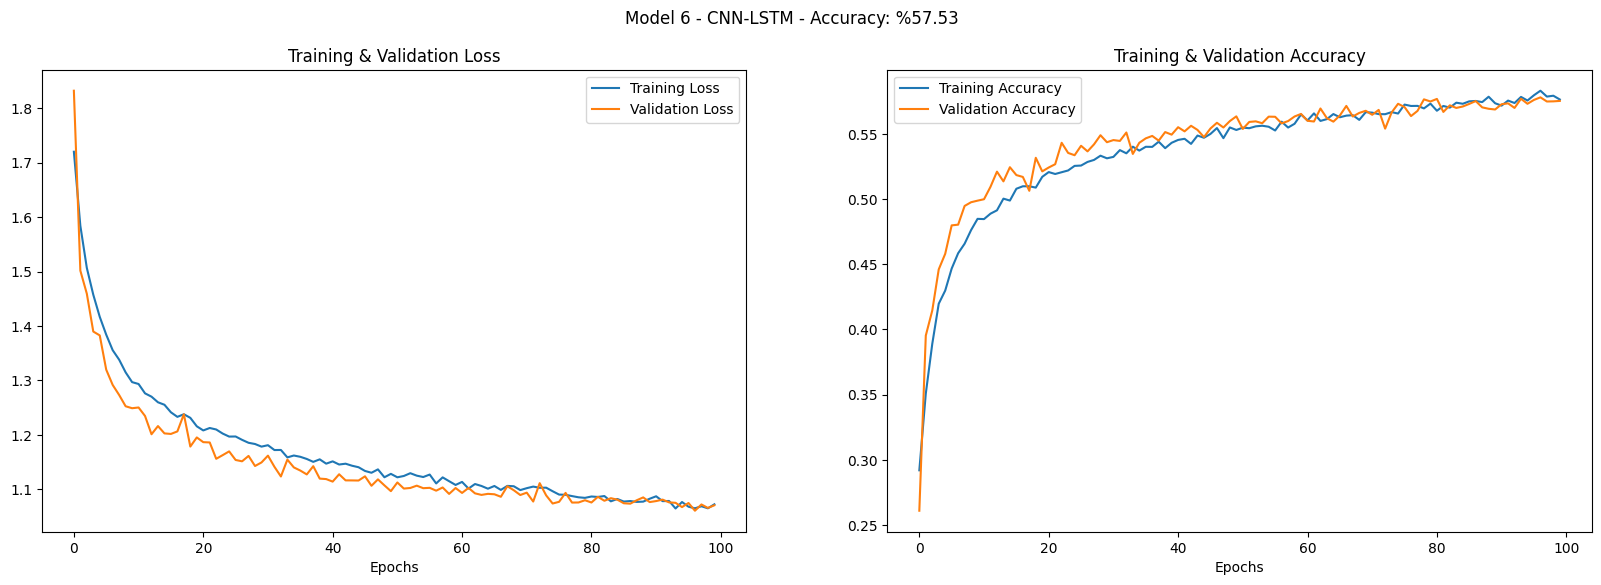

In [29]:
epochs = [i for i in range(len(history.history["loss"]))]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
fig.suptitle(f"Model 6 - CNN-LSTM - Accuracy: %{round(eval[1]*100,2)}")
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.savefig("../SpeechER/figs/model6.png")

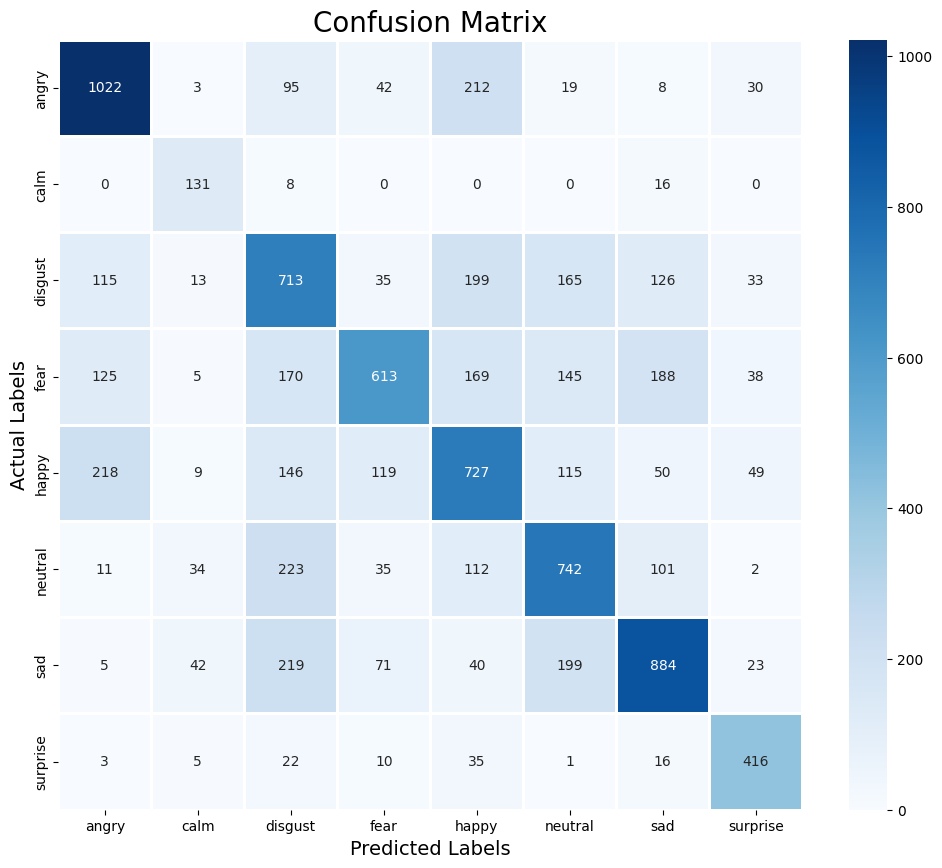

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.68      0.71      0.70      1431
        calm       0.54      0.85      0.66       155
     disgust       0.45      0.51      0.48      1399
        fear       0.66      0.42      0.52      1453
       happy       0.49      0.51      0.50      1433
     neutral       0.54      0.59      0.56      1260
         sad       0.64      0.60      0.62      1483
    surprise       0.70      0.82      0.76       508

    accuracy                           0.58      9122
   macro avg       0.59      0.63      0.60      9122
weighted avg       0.58      0.58      0.57      9122

